<a href="https://colab.research.google.com/github/iamatul1214/LLMs-finetuning/blob/main/Quantization_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook shows how the quantization works.

#### int8 Quantization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate original float values just like these are the model weights)
x = np.linspace(-1.0, 1.0, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

In [ ]:
# Let's define quantization parameters
min_x = -1.0
max_x = 1.0
qmin = -128
qmax = 127

# Calculate scale and zero point for symmetric quantization
scale = (max_x - min_x) / (qmax - qmin)  # step size
scale

0.00784313725490196

In [ ]:
zero_point = 0  # symmetric quantization

# Quantization: float -> int8
q = np.round((x - zero_point) / scale).astype(int)

# Clip to valid range
q = np.clip(q, qmin, qmax)
q[:10]

array([-128, -125, -122, -120, -117, -115, -112, -109, -107, -104])

## Now we would dequantize them as well

In [ ]:
# Dequantization: int8 -> float
x_hat = scale * (q - zero_point)
x_hat[:10]

array([-1.00392157, -0.98039216, -0.95686275, -0.94117647, -0.91764706,
       -0.90196078, -0.87843137, -0.85490196, -0.83921569, -0.81568627])

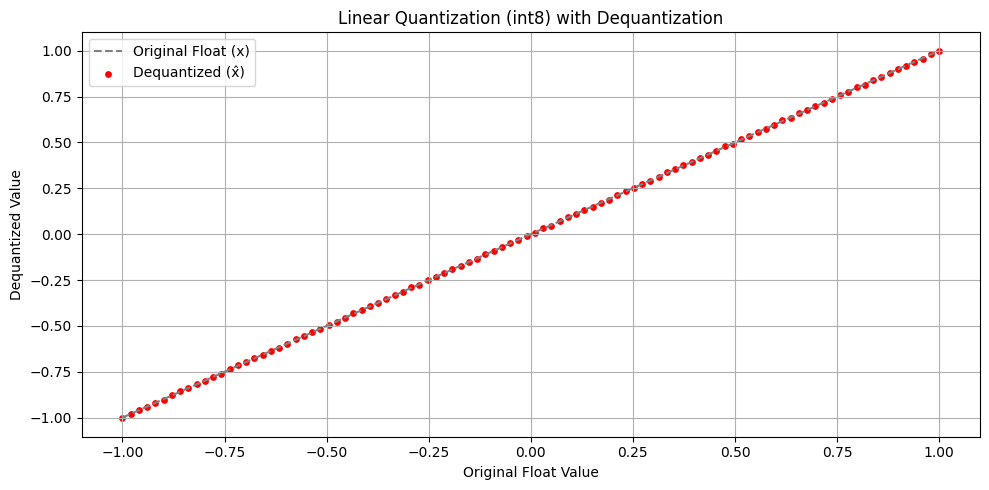

In [ ]:
# Plot original vs. dequantized
plt.figure(figsize=(10, 5))
plt.plot(x, x, label='Original Float (x)', linestyle='--', color='gray')
plt.scatter(x, x_hat, label='Dequantized (x̂)', color='red', s=15)
plt.title('Linear Quantization (int8) with Dequantization')
plt.xlabel('Original Float Value')
plt.ylabel('Dequantized Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## From the graph above we see that the dequantization hasn't changed any direction

## NF4 (Normal Float 4) Quantization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define 16 NF4 representative float values
# These are example NF4 values (manually chosen to mimic a Gaussian distribution)
# In practice, libraries like bitsandbytes use optimized values
nf4_values = np.array([
    -1.0, -0.75, -0.5, -0.35, -0.2, -0.1, -0.05, -0.01,
     0.01,  0.05,  0.1,  0.2,  0.35,  0.5,  0.75,  1.0
])

# Step 2: Simulate original float values
x = np.linspace(-1.0, 1.0, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

In [ ]:
# Step 3: Quantize x by mapping to nearest NF4 value
def quantize_to_nf4(x_vals, nf4_lut):
    indices = np.argmin(np.abs(x_vals[:, None] - nf4_lut[None, :]), axis=1)
    return nf4_lut[indices]

x_nf4 = quantize_to_nf4(x, nf4_values)
x_nf4[:10]

array([-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -0.75, -0.75,
       -0.75])

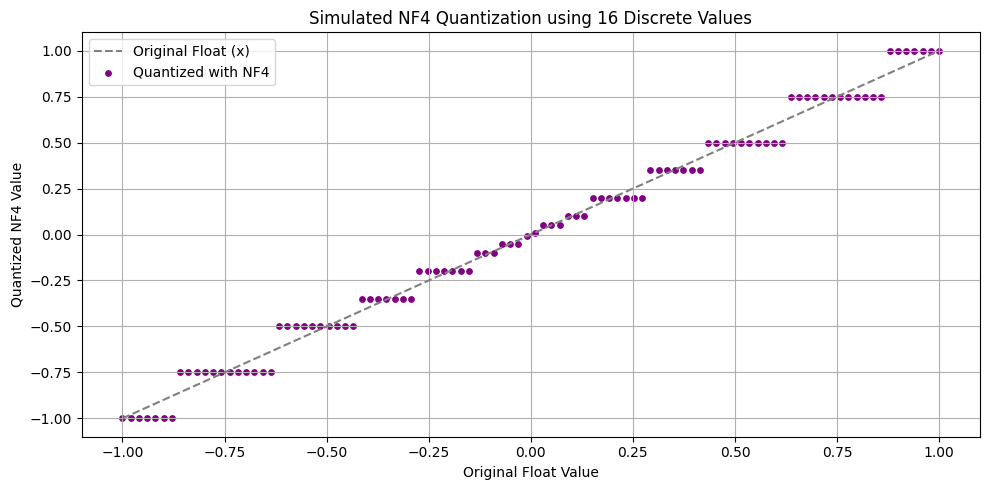

In [ ]:
# Step 4: Plot original vs. quantized (NF4)
plt.figure(figsize=(10, 5))
plt.plot(x, x, label='Original Float (x)', linestyle='--', color='gray')
plt.scatter(x, x_nf4, label='Quantized with NF4', color='purple', s=15)
plt.title('Simulated NF4 Quantization using 16 Discrete Values')
plt.xlabel('Original Float Value')
plt.ylabel('Quantized NF4 Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()